In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("AdmissionData.csv")
df.drop(['Serial No.'],axis=1,inplace=True)
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [3]:
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[X_train.columns])
X_test = scaler.fit_transform(X_test[X_test.columns])

In [4]:
regr = LinearRegression()
regr.fit(X_train,y_train)
pred = regr.predict(X_test)

Feature: 0, Score:0.266705
Feature: 1, Score:0.182263
Feature: 2, Score:0.029399
Feature: 3, Score:0.017880
Feature: 4, Score:0.158655
Feature: 5, Score:0.675811
Feature: 6, Score:0.119405


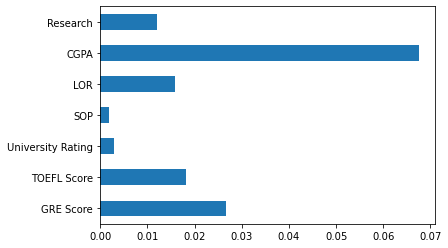

In [5]:
f_imp = regr.coef_
for i, v in enumerate(f_imp):
    print('Feature: %0d, Score:%f'%(i,v*10))
    
f_imp = pd.Series(regr.coef_, index = features.columns)
f_imp.plot(kind = 'barh')
plt.show()

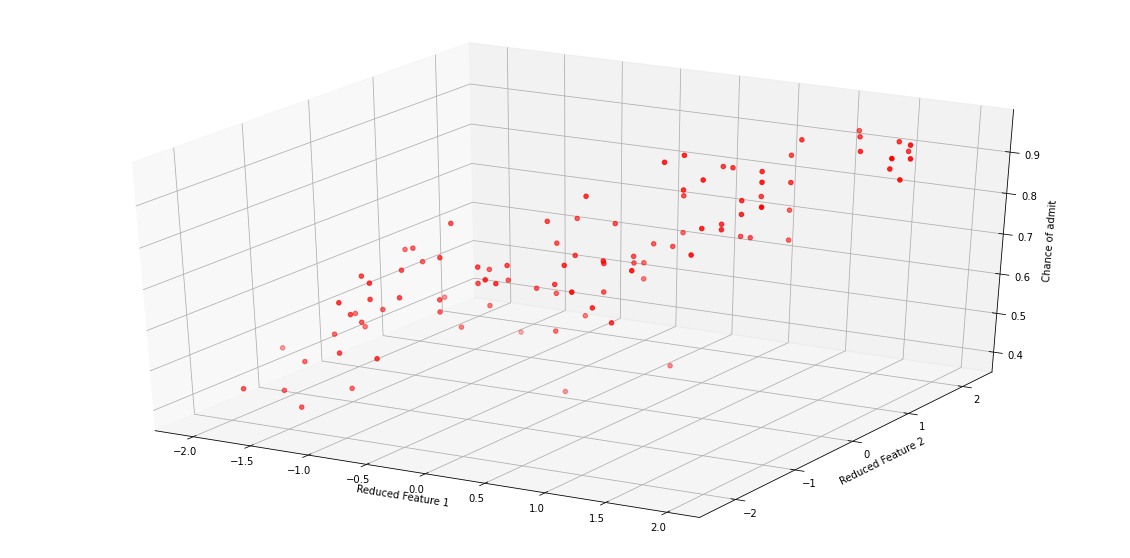

In [6]:
ax = plt.figure(figsize=(20,10)).add_subplot(projection = '3d')
ax.set_xlabel('Reduced Feature 1')
ax.set_ylabel('Reduced Feature 2')
ax.set_zlabel('Chance of admit')
# ax.plot3D(X_test[:,0],X_test[:,1],pred,c = 'blue');
ax.scatter3D(X_test[:,0],X_test[:,1],y_test,c = 'red');

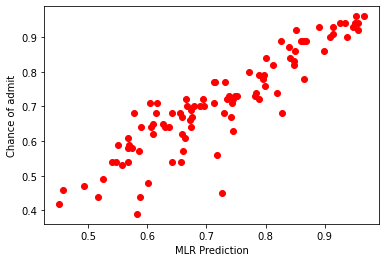

In [7]:
plt.xlabel('MLR Prediction')
plt.ylabel('Chance of admit')
# plt.plot(pred,y_test,color='blue');
plt.scatter(pred,y_test,color='red');

In [8]:
test_set_sme = mean_squared_error(y_test, pred)
test_set_rmse = np.sqrt(test_set_sme)
test_set_r2 = r2_score(y_test, pred)

print("Squared Mean Error= ", test_set_sme)
print("Root Squared Mean Error= ", test_set_rmse)
print("Coefficient of Determination= ", test_set_r2)

Squared Mean Error=  0.0037617451048847245
Root Squared Mean Error=  0.061333066977648565
Coefficient of Determination=  0.8160515841132164


In [11]:
#y_test=np.array(y_test)
print("Accuracy Acheived= ", regr.score(X_test,y_test)*100,"%!")
print(classification_report(y_test, pred.round()))

Accuracy Acheived=  81.60515841132164 %!


ValueError: Classification metrics can't handle a mix of continuous and binary targets